### C. Jimison "On my honor, as a student, I have neither given nor received unauthorized data on this academic work."

## Importing Packages

In [215]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
# model validation
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [216]:
# Importing Data for project
df = pd.read_csv('movie_metadata.csv')

In [217]:
# Viewing column heads
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# 1. Business Understanding

### a) The goal of this project is to predict the potential succes of a movie based on different variables that have to do with the production and promotion of the film.
### b) If I were doing the data collection, some of the firsgt datapoints that i would look for when it comes to movies are; overall budget of production, director, time of release, etc.
### c) We will use a correlation analysis to see if these variables that i mentioned, or other ones, would be best for predicting movie score through iMDB.

# 2. Data Understanding

In [218]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [219]:
len(df)

5043

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [221]:
df['imdb_score'].value_counts().sort_values(ascending=False).head()

6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
Name: imdb_score, dtype: int64

### Looks like a lot of Average Movies!!

# 3. Data Preparation

In [222]:
df = df.dropna()
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

# 4. Business Intelligence

In [224]:
## What is the sum of budget for these movies?
## What is the average Budget for these Movies?
## What is the average duration of these movies?
print(df['budget'].sum())
print(df['budget'].mean())
print(df['duration'].mean())

173665607240.0
46236849.637912676
110.25798722044729


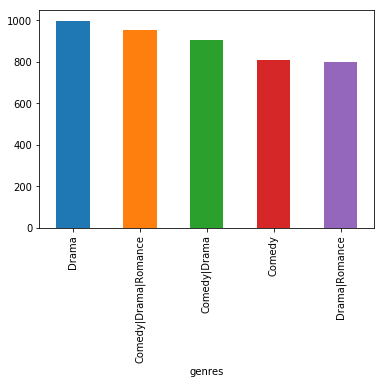

In [225]:
# Which genre has the highest total iMDB Scores
df.groupby('genres')['imdb_score'].sum().sort_values(ascending=False).head().plot(kind='bar');

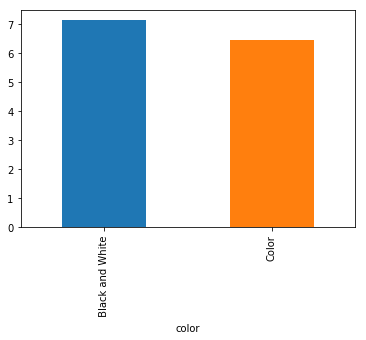

In [226]:
# Which category, black or white, has a higher overall average iMDB Score?
df.groupby('color')['imdb_score'].mean().sort_values(ascending=False).head().plot(kind='bar');

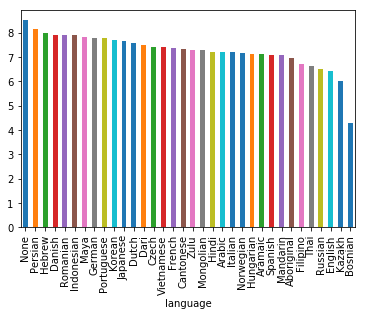

In [227]:
# Which language has the highest average iMDB Score?
# Where is English in the rankings?
df.groupby('language')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar');

C:\casey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


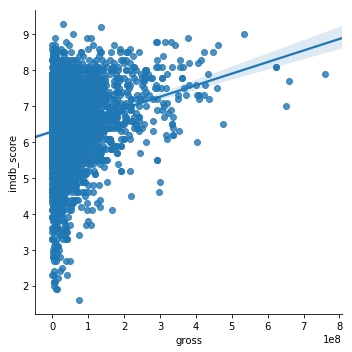

In [228]:
# What is the relationship between Gross earnings of each movie and its IMDB Score?
sns.lmplot('gross', 'imdb_score', df);

# 5. Correlation Analysis

In [229]:
# Lets look at the correlation between these variables
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


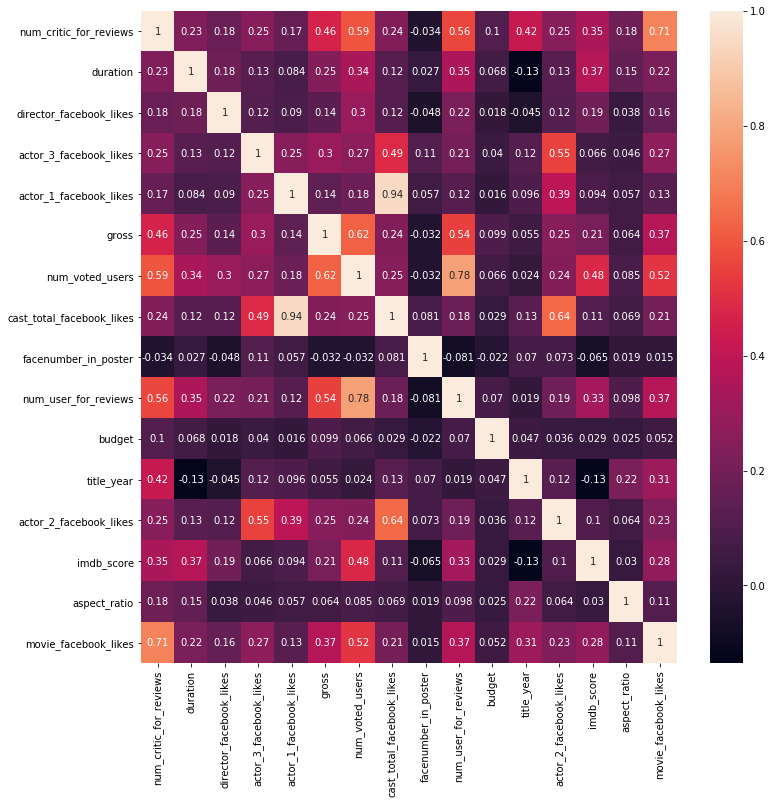

In [230]:
# Lets visualize it to get a better picture of these relationships
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

### Based on the correlation analysis and the heatmap provided it seems like there aren't any variables that are very highly correlated to iMDB_score. The variables that are highest in correlation are num_vated_users, duration, and num_critic_for_review.
### Some of the variables that are highly correlated to each other are; total cast facebook likes and individual actor facebook likes, the movie's facebook likes and gross earnings.
### Surprisingly, overall Budget was not highly correlated with any of the variables.

# 6. Regression

## Model Development

In [231]:
# Going to go ahead and drop those variables that were found to be useless based on previous correlation analysis
df = df.drop(['facenumber_in_poster', 'aspect_ratio', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes'], axis=1)
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0


In [232]:
# A look at what is left for us to play with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 23 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_2_name                 3756 non-null object
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-null object
num_user_for_reviews         3756 non-null float64
language                     3756 non-null object
country                      3756 non-nu

In [233]:
# Setting up variables, forgetting about categorical variables
y = df['imdb_score'] 
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'movie_facebook_likes']]

In [234]:
# Splitting data into Test and Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [235]:
# Confirming length of data
len(df)

3756

In [236]:
# Making sure proportions are correct
len(X_train), len(X_test)

(2629, 1127)

In [237]:
# build a multiple regression model below

regmodel1 = lm.LinearRegression()
regmodel1.fit(X, y)   
regmodel1_y = regmodel1.predict(X)

In [238]:
# How would this equation look with its coefficients and intercept?
print('Coefficients: ', regmodel1.coef_)
print("y-intercept ", regmodel1.intercept_)

Coefficients:  [ 2.76558561e-03  1.00800926e-02  3.42421744e-06 -2.39729428e-09
  3.74463989e-06 -5.81460425e-07 -6.18991464e-04 -3.98748492e-11
 -2.38083252e-02 -2.71343780e-06]
y-intercept  52.54800116420796


In [239]:
pd.DataFrame(list(zip(X.columns, np.transpose(regmodel1.coef_))))

,0,1
0,num_critic_for_reviews,2.765586e-03
1,duration,1.008009e-02
2,director_facebook_likes,3.424217e-06
3,gross,-2.397294e-09
4,num_voted_users,3.744640e-06
5,cast_total_facebook_likes,-5.814604e-07
6,num_user_for_reviews,-6.189915e-04
7,budget,-3.987485e-11
8,title_year,-2.380833e-02
9,movie_facebook_likes,-2.713438e-06


In [240]:
coef = ["%.3f" % i for i in regmodel1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.024'),
 ('movie_facebook_likes', '-0.000')]

In [241]:
# Just how affective is this Regression Analysis
print("mean square error: ", mean_squared_error(y, regmodel1_y))
print("variance or r-squared: ", explained_variance_score(y, regmodel1_y))

mean square error:  0.7203477116771433
variance or r-squared:  0.3541568628220232


### As you can see from the regression analysis performed above, the quantitative variables only account for ~35% of the variation in the IMDB Score. This is not a very good R-Squared value confirming what i found in the correlation analysis. Some of these data points just were not important enough in the prediction of the IMDB Score and in turn the overall success of the movie.

### Now I will be more selective with the variables chosen in the regression analysis. I will use those data points that were most correlated to 'imdb_score'

In [242]:
# Pick the most correlated variables at first glance
y = df['imdb_score'] 
X = df[['num_voted_users', 'duration', 'num_critic_for_reviews']]

In [243]:
# Splitting new variables data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [244]:
# New regression model build
regmodel2 = lm.LinearRegression()
regmodel2.fit(X, y)   
regmodel2_y = regmodel2.predict(X)

In [245]:
print('Coefficients: ', regmodel2.coef_)
print("y-intercept ", regmodel2.intercept_)

Coefficients:  [2.46390198e-06 1.05456094e-02 7.36400086e-04]
y-intercept  4.918540436769661


In [246]:
pd.DataFrame(list(zip(X.columns, np.transpose(regmodel2.coef_))))

,0,1
0,num_voted_users,0.000002
1,duration,0.010546
2,num_critic_for_reviews,0.000736


In [247]:
coef = ["%.3f" % i for i in regmodel1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_voted_users', '0.003'),
 ('duration', '0.010'),
 ('num_critic_for_reviews', '0.000')]

In [248]:
# Just how affective is this Regression Analysis
print("mean square error: ", mean_squared_error(y, regmodel2_y))
print("variance or r-squared: ", explained_variance_score(y, regmodel2_y))

mean square error:  0.7987745639710211
variance or r-squared:  0.28384159215010973


### By selecting the most important vartiables according to the correlation analysis I was able to account for .28 of the .35 R-Squared valed. That is 66% of the previously found R-Squared value only from three of the data points.

# 7. Classification

In [249]:
# Creating new Categorical value using bins to describe how good the Movie is based on IMDB Score
df['imdb_bins'] = pd.qcut(df['imdb_score'].values, 4).codes

In [250]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,imdb_bins
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000,3
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0,2


In [251]:
# declare X variables and y variable

y = df['imdb_bins']
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'movie_facebook_likes']]

## DecisionTreeClassifier

In [252]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [253]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")



0.44809228039041704
--------------------------------------------------------
[[163  90  39  11]
 [ 70 103  65  45]
 [ 47  72  91  65]
 [ 15  45  58 148]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       303
           1       0.33      0.36      0.35       283
           2       0.36      0.33      0.34       275
           3       0.55      0.56      0.55       266

   micro avg       0.45      0.45      0.45      1127
   macro avg       0.45      0.45      0.45      1127
weighted avg       0.45      0.45      0.45      1127

--------------------------------------------------------


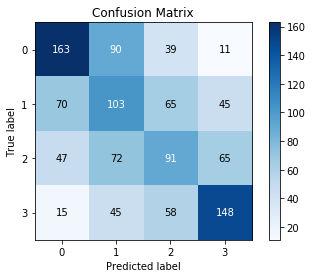

In [254]:
# Lets make this Confusion Matrix a little more Pretty
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

## RandomForestGenerator

In [255]:
# Like Multiple DecisionTrees all rolled into one model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5323868677905945

In [256]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.5323868677905945
[[215  56  27   5]
 [ 78 129  59  17]
 [ 37  96  90  52]
 [  3  36  61 166]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       303
           1       0.41      0.46      0.43       283
           2       0.38      0.33      0.35       275
           3       0.69      0.62      0.66       266

   micro avg       0.53      0.53      0.53      1127
   macro avg       0.53      0.53      0.53      1127
weighted avg       0.53      0.53      0.53      1127



### As you can see this model has given us our best results so far as to what makes a movie successful.

# 8. Clustering

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 24 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_2_name                 3756 non-null object
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-null object
num_user_for_reviews         3756 non-null float64
language                     3756 non-null object
country                      3756 non-nu

In [258]:
# Need to get rid of the categorical variables and only view those that are quantitative so that we can normalize the data
df2 = df.drop(['color', 'actor_2_name', 'genres', 'director_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], axis = 1)
df2.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,imdb_bins
0,723.0,178.0,0.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,7.9,33000,3
1,302.0,169.0,563.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,7.1,0,2


In [259]:
# Normalizing the data
df_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,imdb_bins
0,0.685107,0.231201,-0.035102,0.930819,0.461851,-0.010192,0.537412,0.015616,0.067679,0.186327,0.067754,0.528044
1,0.165995,0.200485,-0.010623,0.337659,0.216251,0.056070,0.178235,0.020774,0.045207,0.082431,-0.026802,0.194711
2,0.535908,0.128812,-0.035102,0.193899,0.100636,0.000263,0.129976,0.016271,0.135095,0.043470,0.216751,0.194711
3,0.796081,0.183420,0.921420,0.520072,0.614622,0.145009,0.467594,0.016681,0.101387,0.264249,0.443112,0.528044
5,0.363282,0.074205,-0.014449,0.026885,0.062957,-0.014700,0.079343,0.017802,0.101387,0.017496,0.041966,-0.138623


In [260]:
# Making 3 clusters to give us a better idea of what makes movies good
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)

In [261]:
k_means.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [262]:
k_means.cluster_centers_

array([[1.67356971e+02, 1.10246868e+02, 8.06624633e+02, 5.26815383e+07,
        1.05870950e+05, 1.15409232e+04, 3.36997867e+02, 4.00486770e+07,
        2.00297601e+03, 6.46400960e+00, 9.36001146e+03, 1.41455612e+00],
       [3.63000000e+02, 1.10000000e+02, 5.84000000e+02, 2.20141200e+06,
        6.88830000e+04, 1.17300000e+03, 2.79000000e+02, 1.22155000e+10,
        2.00600000e+03, 7.00000000e+00, 7.00000000e+03, 2.00000000e+00],
       [1.38500000e+02, 1.20750000e+02, 1.53075000e+03, 7.79033500e+05,
        7.35975000e+04, 1.15475000e+03, 2.06250000e+02, 2.80687997e+09,
        2.00275000e+03, 7.52500000e+00, 4.14500000e+03, 2.50000000e+00]])

In [263]:
# Adding a new column to the dataframe that shows our new clusters
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [264]:
# Joining the dataframes 
df2 = df_norm.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,imdb_bins,cluster
0,0.685107,0.231201,-0.035102,0.930819,0.461851,-0.010192,0.537412,0.015616,0.067679,0.186327,0.067754,0.528044,0.0
1,0.165995,0.200485,-0.010623,0.337659,0.216251,0.056070,0.178235,0.020774,0.045207,0.082431,-0.026802,0.194711,0.0
2,0.535908,0.128812,-0.035102,0.193899,0.100636,0.000263,0.129976,0.016271,0.135095,0.043470,0.216751,0.194711,0.0
3,0.796081,0.183420,0.921420,0.520072,0.614622,0.145009,0.467594,0.016681,0.101387,0.264249,0.443112,0.528044,0.0
5,0.363282,0.074205,-0.014449,0.026885,0.062957,-0.014700,0.079343,0.017802,0.101387,0.017496,0.041966,-0.138623,0.0


In [265]:
# Lets see the average values for the variables in each cluster
df2.groupby(['cluster']).mean() 

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,imdb_bins
cluster,,,,,,,,,,,,
0.0,0.008290,0.005479,0.003476,0.008528,0.005370,0.001423,0.003891,0.000404,0.005864,-0.004341,0.001957,-0.013311
1.0,-0.150898,0.012771,-0.031928,-0.049326,-0.049140,-0.012308,-0.047635,-0.002557,-0.213220,-0.060426,-0.026802,-0.138623
2.0,-0.122538,-0.002587,-0.033917,-0.049234,-0.055866,-0.003035,-0.042097,-0.002422,-0.016591,-0.109128,-0.025542,-0.055289


## Profiling the Clusters

### Cluster 0: High Budget, High IMDB Score, Large number of voted users, high gross earnings
### Cluster 1: Average Budget, Average IMDB Score, Low number of voted users, low gross earnings
### Cluster 2: Low Budget, Low IMDB Score, Low Number of Voted Users, low Gross earnings

# 9. Storytelling

## In this project I have analyzed all of the data and moved through the different steps of cleaning the data and choosing which variables I thought would be very influential to the overall IMDB scores of these movies. Something that was versus surprising was the types of data that I kind in this set. I really expected there to be more money figures in the dataset because it seems that these types of data points would be most influential on the overall rating of the movies. When I saw that the data points were mainly based around reviews both by movie critics and by people on social media sites such as Facebook then I knew the correlation would be much more related to personal opinion by viewers instead of the actual box office performance of the films. For instance, I thought for sure that overall budget and gross earnings would reflect greatly on the performance of the movies in terms of IMDb ratings. But was shocked to see that the only variables that somewhat strong positive correlation with IMDb score were variables that had to do with reviews such as the number of voted users and number of critics for reviews. Something that I thought would be positively correlated with IMDb score that was actually accurate was duration. It had a slight positive correlation with IMDb score.

## After visualizing the data and performing a correlation analysis, I decided to creat some Machine-Learning models to be deployed on the data to find out more on what causes a movie to have a high IMDB Score and in turn be a more successful movie. After doing a regression analysis I found that the variance in the variables given had a 35% direct affect on the variance of the dependent variable 'imdb_score'. This was not a good predictor for what makes a good movie so it does follow along with what I found in the correlation analysis. The next step was to create some classification models to determine what level of IMDB Score the movie received. These classification models that i created that included a DecisionTreeClassifier and a Random Forest Generator did a much better job of determining what the IMDB Score for each movie should be based on all of the variables given in the dataset.The Random Forest Generator got up to a confidence level of over 53% which tells me that this data does have some helpful variables in it to be a somewhat reliable predictor of movie success. The next analysis that was done was a Clustering Analysis to put all of the different movies into different clusters in order to give them a category that they fit in as far as grouping the variable data together to give us an idea of what average values were for the variables of each cluster. These clusters direct reflect what it takes for a movie to be bad or great.

## Overall I think that this data could have had some better variables of interest in order to find a better correlation with how a movie performs. I highly recommend that different data points are gathered in order to be able to appropriately create movies that the audiences will love. Whether it was through simple analyses of the data or more intensive analyses that included machine learning I still feel like the data could have been a little more useful had there been more datapoints and more important variables that correlated more to the movies dependent variable, 'imdb_score'.
